In [1]:
#import pandas library
import pandas as pd

#import numpy library
import numpy as np

#import matplot and seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import training dataset
titan = pd.read_csv(r"C:\Users\wilco\Desktop\Franklin U\DATA 612\Spaceship Titanic\train.csv")

#first look at the dataset
print(titan)

     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa 

In [2]:
#Use .head() to review the first 5 rows
print(titan.head())

#Use .tail() to review the last 5 rows
print(titan.tail())

#Use .shape to view number of rows and number of columns
print('')
print('Shape: ',titan.shape)

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
  

In [3]:
#Use .info() to view what the data types look like
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
# Use .describe() to exploring some statistics within the dataset
titan.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
#Because the Cabin column contains multiple levels of information such as Deck, Number, and Side
#I'm going to split the 'Cabin' column into three separtate columns
cabin_split = titan['Cabin'].str.split(pat='/', expand=True)

#Then, create new columns for the split data
titan['CabinDeck'] = cabin_split[0]
titan['CabinNum'] = cabin_split[1]
titan['CabinSide'] = cabin_split[2]

#Drop the original 'Cabin' column
titan = titan.drop(columns='Cabin')

#View new dataset
print(titan)

#Check dtypes again
print(titan.info())

     PassengerId HomePlanet CryoSleep    Destination   Age    VIP  \
0        0001_01     Europa     False    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False    TRAPPIST-1e  16.0  False   
...          ...        ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False    55 Cancri e  32.0  False   
8692     9280_02     Europa     False    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        

In [6]:
#Check for missing values
print(titan.isna().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
CabinDeck       199
CabinNum        199
CabinSide       199
dtype: int64


In [7]:
#To start working with missing values, I'm going to begin with the columns I just split
print('Deck:',titan['CabinDeck'].unique())
print(titan['CabinDeck'].value_counts())
print('')
print('Number:',titan['CabinNum'].unique())
print('')
print('Side:',titan['CabinSide'].unique())
print(titan['CabinSide'].value_counts())
print('')

# and do the same for the VIP column
print('VIP:',titan['VIP'].unique())
print(titan['VIP'].value_counts())

Deck: ['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: CabinDeck, dtype: int64

Number: ['0' '1' '2' ... '1892' '1893' '1894']

Side: ['P' 'S' nan]
S    4288
P    4206
Name: CabinSide, dtype: int64

VIP: [False True nan]
False    8291
True      199
Name: VIP, dtype: int64


In [8]:
#Since F is the most common Cabin Deck, I will use F to fill the nan values
titan['CabinDeck'] = titan['CabinDeck'].fillna(value='F')

#Use mean to fill in missing cabin numbers and convert dtype into int
CabinNum_Mean = titan['CabinNum'].isnull().mean()
titan['CabinNum'] = titan['CabinNum'].fillna(CabinNum_Mean)
titan['CabinNum'] = titan['CabinNum'].astype(int)

#Use S to fill in Cabin Side since S is most common
titan['CabinSide'] = titan['CabinSide'].fillna(value='S')

#Since False is most common, fill in False
titan['VIP'] = titan['VIP'].fillna(False)

#view remaining null data
print('Deck:',titan['CabinDeck'].unique())
print(titan['CabinDeck'].value_counts())
print('')
print('Number:',titan['CabinNum'].unique())
print('')
print('Side:',titan['CabinSide'].unique())
print(titan['CabinSide'].value_counts())
print('')
print(titan['VIP'].unique())
print(titan['VIP'].value_counts())

Deck: ['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
F    2993
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: CabinDeck, dtype: int64

Number: [   0    1    2 ... 1892 1893 1894]

Side: ['P' 'S']
S    4487
P    4206
Name: CabinSide, dtype: int64

[False  True]
False    8494
True      199
Name: VIP, dtype: int64


In [9]:
# For the float values in the dataset, I'm going to replace null values with the mean.

titan['RoomService'] = titan['RoomService'].fillna(titan['RoomService'].mean())
titan['FoodCourt'] = titan['FoodCourt'].fillna(titan['FoodCourt'].mean())
titan['ShoppingMall'] = titan['ShoppingMall'].fillna(titan['ShoppingMall'].mean())
titan['Spa'] = titan['Spa'].fillna(titan['Spa'].mean())
titan['VRDeck'] = titan['VRDeck'].fillna(titan['VRDeck'].mean())
titan['Age'] = titan['Age'].fillna(titan['Age'].mean())

#check missing values again
print(titan.isna().sum())
print('')
print(titan.info())

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
CabinDeck         0
CabinNum          0
CabinSide         0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64


In [10]:
#Check what type of values are in the 'HomePlanet' and 'Destination' columns
print('Home Planet Values:', titan['HomePlanet'].unique())
print('Home Planet Count:', titan['HomePlanet'].value_counts())
print('NaN:', titan['HomePlanet'].isnull().sum())
print('')
print('Destination Values:', titan['Destination'].unique())
print('Destination Count:', titan['Destination'].value_counts())
print('NaN:', titan['Destination'].isnull().sum())

Home Planet Values: ['Europa' 'Earth' 'Mars' nan]
Home Planet Count: Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
NaN: 201

Destination Values: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Destination Count: TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
NaN: 182


In [11]:
#Because the most common home planet is Earth, I filled in the missing values with Earth
titan['HomePlanet'] = titan['HomePlanet'].fillna(value='Earth')

#Because the most common destination is Trappist-1e, I filled in the missing values withTrappist-1e
titan['Destination'] = titan['Destination'].fillna(value='TRAPPIST-1e')

#viewed the updated list of values
print('Home Planet Values:',titan['HomePlanet'].unique())
print('Destination Values:',titan['Destination'].unique())
print('')

#check the missing values again
print(titan.isna().sum())

Home Planet Values: ['Europa' 'Earth' 'Mars']
Destination Values: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']

PassengerId       0
HomePlanet        0
CryoSleep       217
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
CabinDeck         0
CabinNum          0
CabinSide         0
dtype: int64


In [12]:
#check CryoSleep values
print('CryoSleep Values:',titan['CryoSleep'].unique())
print(titan['CryoSleep'].value_counts())
print('nan: ',titan['CryoSleep'].isna().sum())

CryoSleep Values: [False True nan]
False    5439
True     3037
Name: CryoSleep, dtype: int64
nan:  217


In [13]:
# for the missing CryoSleep values, 
#I'm going to assume that if they spent money, they were likely not in cryosleep

#add all the values of the spending columns and create a new column for total spent
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
titan['TotalSpent'] = titan[spending_cols].sum(axis=1)

#for a total spent of more than 0 will replace null values with False
#incicating they were not in cryosleep
False_cSleep = titan.loc[(titan['CryoSleep'].isna()) & titan['TotalSpent'] > 0]
csdf = False_cSleep.fillna(False)
titan = titan.fillna(csdf)

#for a total spent of 0 will replace null value with True
True_cSleep = titan.loc[(titan['CryoSleep'].isna()) & (titan['TotalSpent'] == 0)]
csdf1 = True_cSleep.fillna(True)
titan = titan.fillna(csdf1)

#check CryoSleep values
print('CryoSleep Values:',titan['CryoSleep'].unique())
print(titan['CryoSleep'].value_counts())
print('nan: ',titan['CryoSleep'].isna().sum())

#check null values again
print('')
print(titan.isna().sum())

CryoSleep Values: [False True]
False    5569
True     3124
Name: CryoSleep, dtype: int64
nan:  0

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            190
Transported       0
CabinDeck         0
CabinNum          0
CabinSide         0
TotalSpent        0
dtype: int64


In [14]:
#The last column with Null values is the Name column
#since this column will not factor into the regression models, I'm going to just drop it
titan = titan.drop(columns='Name')

#view the data information
print(titan.isna().sum())
print('')
print(titan.info())

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
CabinDeck       0
CabinNum        0
CabinSide       0
TotalSpent      0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null

In [136]:
#Next the PassengerId column is made up of a group number and a personal number within that group
#I am going to split that column similar to the way the Cabin was split
passengerid_split = titan['PassengerId'].str.split(pat='_', expand=True)

#I created new columns for the split data
titan['GroupID'] = passengerid_split[0]
titan['NumID'] = passengerid_split[1]

#view dataset again
titan

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinNum,CabinSide,TotalSpent,GroupID,NumID
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,0.0,0001,01
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,736.0,0002,01
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,10383.0,0003,01
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,5176.0,0003,02
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,1091.0,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P,8536.0,9276,01
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S,0.0,9278,01
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S,1873.0,9279,01
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S,4637.0,9280,01


In [137]:
#Now I want to reorder columns
cols = ['PassengerId', 'GroupID', 'NumID', 'HomePlanet', 'Destination', 'Age', 'CabinDeck', 
        'CabinNum', 'CabinSide', 'CryoSleep', 'VIP', 'RoomService', 'FoodCourt',
        'ShoppingMall', 'Spa', 'VRDeck', 'Transported']
titan=titan.reindex(columns=cols)
print(titan)
print('')
print(titan.info())

     PassengerId GroupID NumID HomePlanet    Destination   Age CabinDeck  \
0        0001_01    0001    01     Europa    TRAPPIST-1e  39.0         B   
1        0002_01    0002    01      Earth    TRAPPIST-1e  24.0         F   
2        0003_01    0003    01     Europa    TRAPPIST-1e  58.0         A   
3        0003_02    0003    02     Europa    TRAPPIST-1e  33.0         A   
4        0004_01    0004    01      Earth    TRAPPIST-1e  16.0         F   
...          ...     ...   ...        ...            ...   ...       ...   
8688     9276_01    9276    01     Europa    55 Cancri e  41.0         A   
8689     9278_01    9278    01      Earth  PSO J318.5-22  18.0         G   
8690     9279_01    9279    01      Earth    TRAPPIST-1e  26.0         G   
8691     9280_01    9280    01     Europa    55 Cancri e  32.0         E   
8692     9280_02    9280    02     Europa    TRAPPIST-1e  44.0         E   

      CabinNum CabinSide CryoSleep    VIP  RoomService  FoodCourt  \
0            0    

In [138]:
#import statsmodels for creating linear models
import statsmodels.formula.api as smf

<AxesSubplot:xlabel='Transported', ylabel='count'>

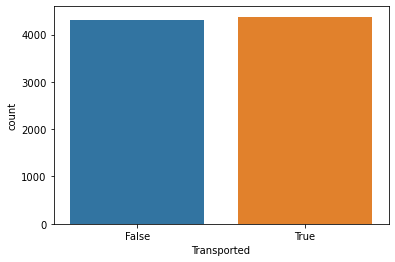

In [139]:
#visualization of the count of Transported
sns.countplot(x=titan['Transported'])

<AxesSubplot:xlabel='VIP', ylabel='count'>

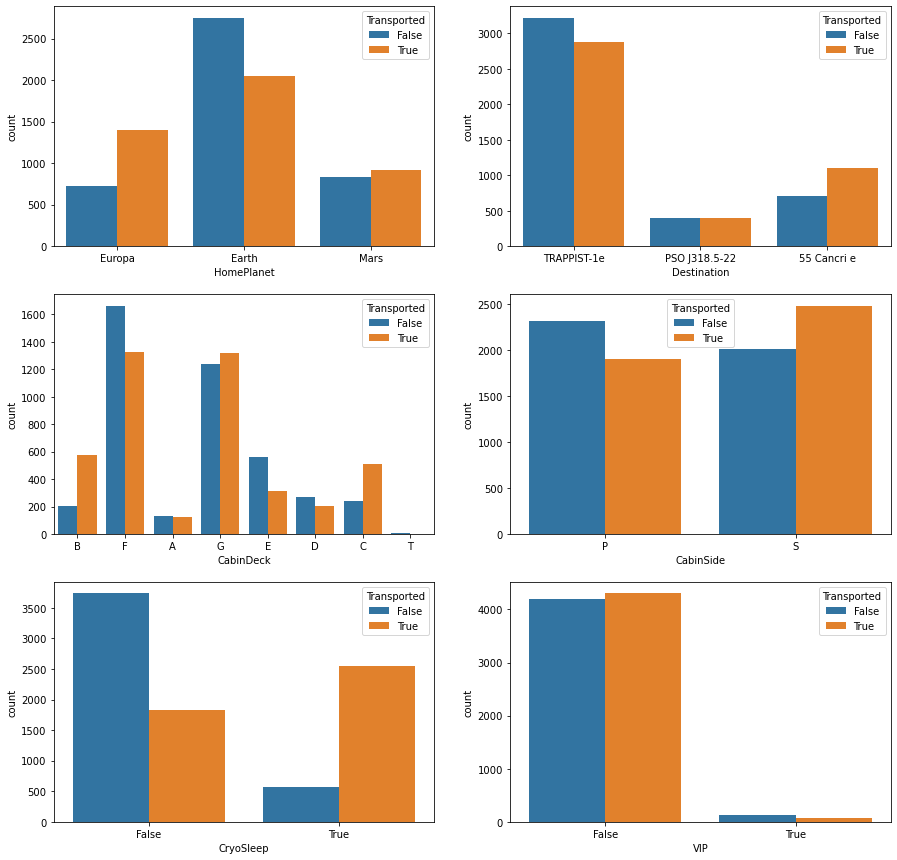

In [140]:
#visualization of counts for categorical data
count, ax = plt.subplots(3,2, figsize= (15,15))
sns.countplot(data=titan, x='HomePlanet', hue='Transported', ax=ax[0,0])
sns.countplot(data=titan, x='Destination', hue='Transported', ax=ax[0,1])
sns.countplot(data=titan, x='CabinDeck', hue='Transported', ax=ax[1,0])
sns.countplot(data=titan, x='CabinSide', hue='Transported', ax=ax[1,1])
sns.countplot(data=titan, x='CryoSleep', hue='Transported', ax=ax[2,0])
sns.countplot(data=titan, x='VIP', hue='Transported', ax=ax[2,1])

<AxesSubplot:xlabel='CabinNum', ylabel='Count'>

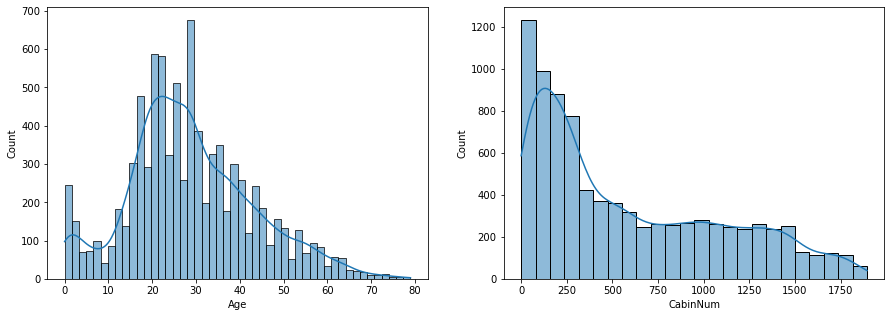

In [141]:
#histograms for numerical data
hist, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=titan, x='Age', ax=ax[0], kde=True)
sns.histplot(data=titan, x='CabinNum', ax=ax[1], kde=True)

<AxesSubplot:xlabel='VRDeck', ylabel='Count'>

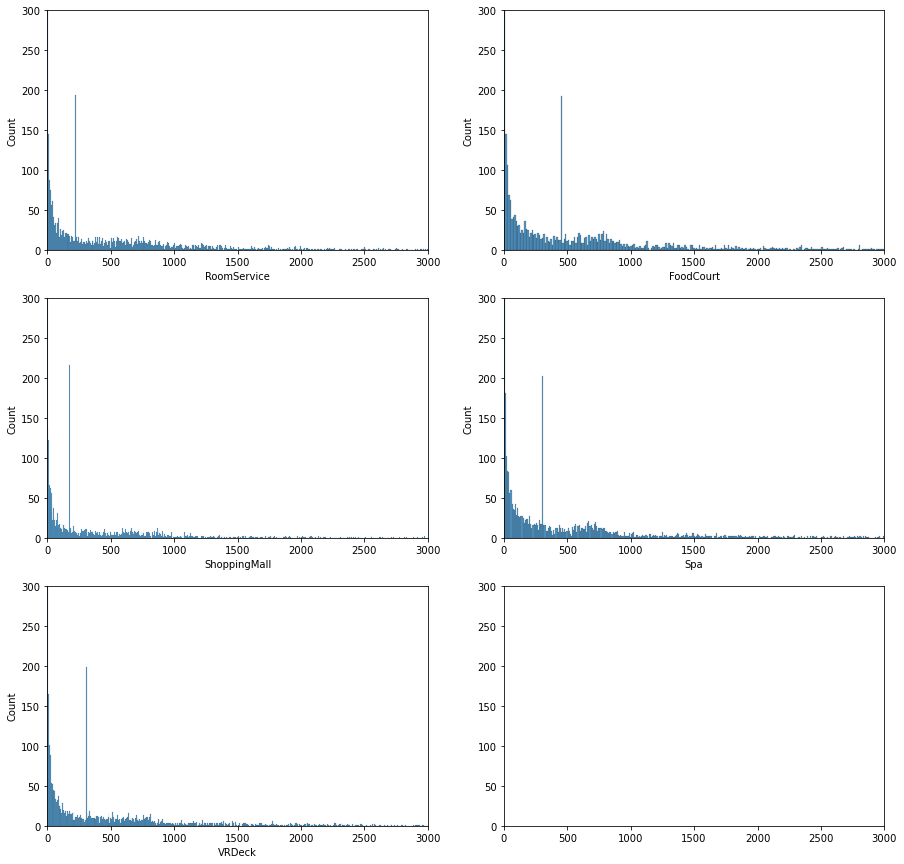

In [142]:
#histogram data for the remaining numerical values
hist, ax = plt.subplots(3,2, figsize=(15,15))
plt.setp(ax, xlim=(0, 3000), ylim=(0,300))
sns.histplot(titan['RoomService'], ax=ax[0,0])
sns.histplot(titan['FoodCourt'], ax=ax[0,1])
sns.histplot(titan['ShoppingMall'], ax=ax[1,0])
sns.histplot(titan['Spa'], ax=ax[1,1])
sns.histplot(titan['VRDeck'], ax=ax[2,0])

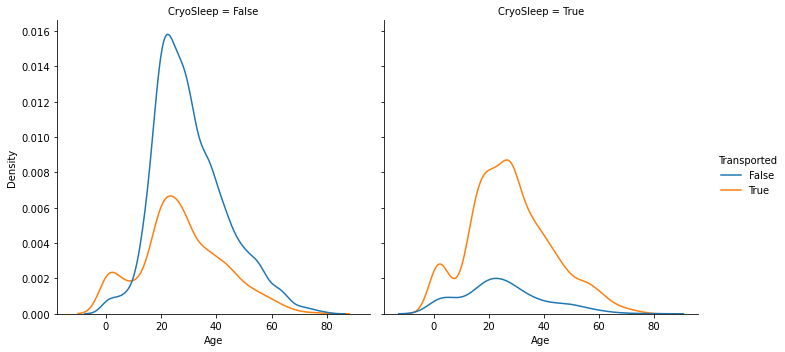

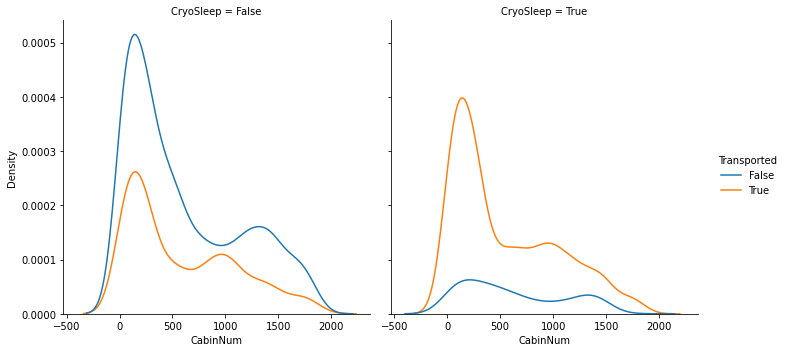

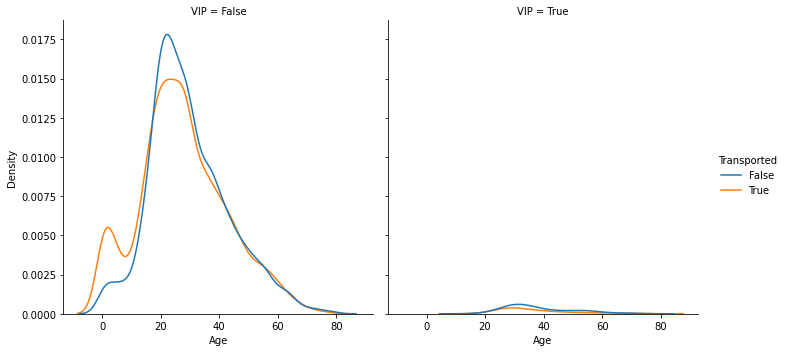

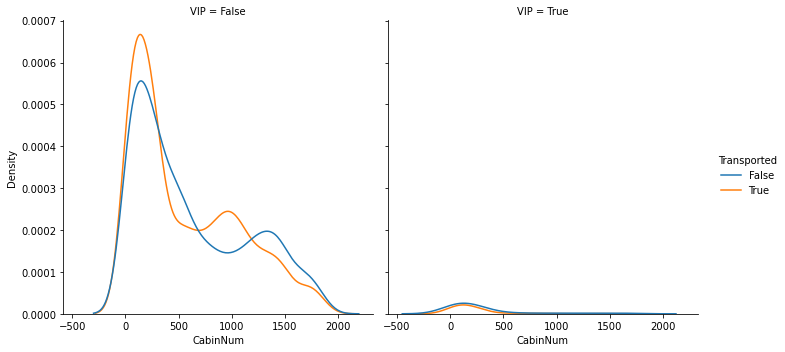

In [143]:
#Here I take a look at the desity of Age values by if they were Transported or Not
#and if they were in CryoSleep or a VIP
sns.displot(titan, x='Age', hue='Transported', col='CryoSleep', kind='kde')
sns.displot(titan, x='CabinNum', hue='Transported', col='CryoSleep', kind='kde')
sns.displot(titan, x='Age', hue='Transported', col='VIP', kind='kde')
sns.displot(titan, x='CabinNum', hue='Transported', col='VIP', kind='kde')
#what we learn from this information is that Cryosleep is a strong indicator of Transported than VIP

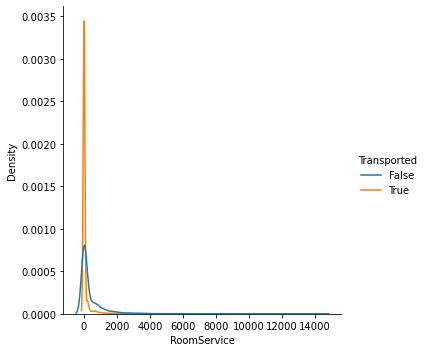

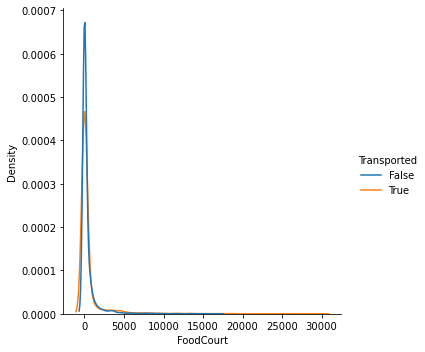

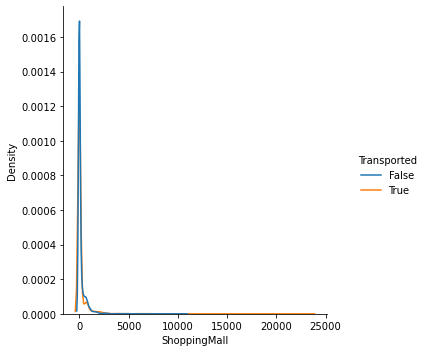

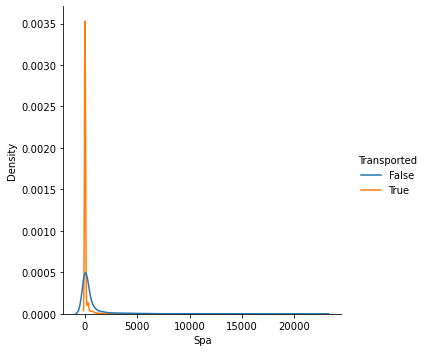

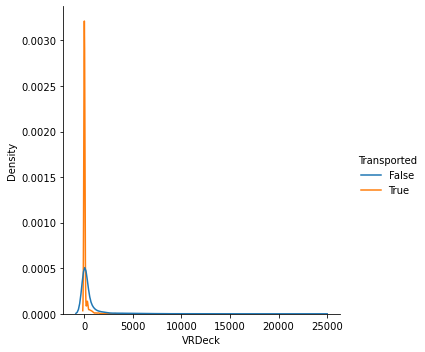

In [144]:
#density plots for money spent columns
sns.displot(titan, x='RoomService', hue='Transported', kind='kde')
sns.displot(titan, x='FoodCourt', hue='Transported', kind='kde')
sns.displot(titan, x='ShoppingMall', hue='Transported', kind='kde')
sns.displot(titan, x='Spa', hue='Transported', kind='kde')
sns.displot(titan, x='VRDeck', hue='Transported', kind='kde')

In [145]:
#change boolean values to integers before running logistic regression model
#0 is False, 1 is True
titan['Transported'] = titan['Transported'].astype(int)
titan['VIP'] = titan['VIP'].astype(int)

#change GroupID and NumID to int as well
titan['GroupID'] = titan['GroupID'].astype(int)
titan['NumID'] = titan['NumID'].astype(int)
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   GroupID       8693 non-null   int32  
 2   NumID         8693 non-null   int32  
 3   HomePlanet    8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   CabinDeck     8693 non-null   object 
 7   CabinNum      8693 non-null   int32  
 8   CabinSide     8693 non-null   object 
 9   CryoSleep     8693 non-null   object 
 10  VIP           8693 non-null   int32  
 11  RoomService   8693 non-null   float64
 12  FoodCourt     8693 non-null   float64
 13  ShoppingMall  8693 non-null   float64
 14  Spa           8693 non-null   float64
 15  VRDeck        8693 non-null   float64
 16  Transported   8693 non-null   int32  
dtypes: float64(6), int32(5), object(6)
memory usage: 984.9+ KB


In [146]:
#first logistic regression model
log_reg_titan = smf.logit('Transported ~ GroupID + NumID + HomePlanet + Destination + Age + CabinDeck + CabinNum +\
                            CabinSide + CryoSleep + VIP + RoomService + FoodCourt + ShoppingMall +\
                            Spa + VRDeck', data=titan).fit()
print(log_reg_titan.summary())

Optimization terminated successfully.
         Current function value: 0.432019
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Transported   No. Observations:                 8693
Model:                          Logit   Df Residuals:                     8669
Method:                           MLE   Df Model:                           23
Date:                Sat, 07 May 2022   Pseudo R-squ.:                  0.3767
Time:                        10:05:10   Log-Likelihood:                -3755.5
converged:                       True   LL-Null:                       -6025.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.5082      0.316     -1.608      0.108

In [147]:
#because p-values for GroupID, NumID, CabinDeck, and VIP are more than 0.05
#remove these from the model and run again
log_reg_titan = smf.logit('Transported ~ HomePlanet + Destination + Age + CabinNum +\
                            CabinSide + CryoSleep + RoomService + FoodCourt +\
                            ShoppingMall + Spa + VRDeck', data=titan).fit()
print(log_reg_titan.summary())

Optimization terminated successfully.
         Current function value: 0.439546
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Transported   No. Observations:                 8693
Model:                          Logit   Df Residuals:                     8679
Method:                           MLE   Df Model:                           13
Date:                Sat, 07 May 2022   Pseudo R-squ.:                  0.3658
Time:                        10:05:15   Log-Likelihood:                -3821.0
converged:                       True   LL-Null:                       -6025.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.2523      0.110     -2.293      0.022

In [148]:
#because this is a logistic regression model,
#I want to test it using a confusion matrix

#first, I'm going to define my x and y values
titan_x = titan[['HomePlanet', 'Destination', 'Age', 'CabinNum', 'CabinSide',
                               'CryoSleep', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
titan_y = titan[['Transported']]

In [149]:
#then, create a prediction model using the .predict() function in the statsmodels library
y_hat = log_reg_titan.predict(titan_x)

#then create a list of those predictions, map and round so that the values that return are binary
predictions = list(map(round, y_hat))

In [150]:
#import sklearn library's confusion matrix and accuarcy score functions
from sklearn.metrics import (confusion_matrix, accuracy_score)

#print the confusion matrix using predictions and actual values
#print the accuracy score
print(confusion_matrix(titan_y, predictions))
print('Accuracy:', accuracy_score(titan_y, predictions))

#The model appears to be almost 80% accurate in predicting if a passanger was transported or not

[[3326  989]
 [ 811 3567]]
Accuracy: 0.7929368457379501
